In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#BigQuery Spark Procedures for Data Import & Export

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/vinodpatel05/bigquery_data_quality/blob/main/bigquery_data_quality_and_validation_with_bigframes.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2Fvinodpatel05%2Fbigquery_data_quality%2Fmain%2Fbigquery_data_quality_and_validation_with_bigframes.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/vinodpatel05/bigquery_data_quality/main/bigquery_data_quality_and_validation_with_bigframes.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/bigquery/import?url=https://github.com/vinodpatel05/bigquery_data_quality/blob/main/bigquery_data_quality_and_validation_with_bigframes.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/bigquery/v1/32px.svg" alt="BigQuery Studio logo"><br> Open in BigQuery Studio
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/vinodpatel05/bigquery_data_quality/blob/main/bigquery_data_quality_and_validation_with_bigframes.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/applying-llms-to-data/semantic-search-in-bigquery/stackoverflow_questions_semantic_search.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/applying-llms-to-data/semantic-search-in-bigquery/stackoverflow_questions_semantic_search.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/applying-llms-to-data/semantic-search-in-bigquery/stackoverflow_questions_semantic_search.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/applying-llms-to-data/semantic-search-in-bigquery/stackoverflow_questions_semantic_search.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/applying-llms-to-data/semantic-search-in-bigquery/stackoverflow_questions_semantic_search.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>            

| | |
|-|-|
|Author(s) | [Arjit Shukla](https://github.com/arjitshu) |

## Objectives

BigQuery Spark procedures allow you to run Apache Spark code directly from BigQuery using standard SQL. This capability is powered by Dataproc Serverless, so you don't need to manage any clusters.

This approach is highly effective for modern data pipelines, combining the power of Spark with BigQuery's simplicity. The cost of running a Spark procedure is identical to a Dataproc Serverless job.

This notebook provides code templates for common BigQuery Spark procedure use cases, including:

1. **Data Export:** Exporting data from a BigQuery table to GCS.

2. **Data Import:** Moving data from GCS to a BigQuery table.


## Sample dataset

This notebook utilizes a publicly available dataset from Google Cloud's BigQuery Public Datasets program:

**Dataset Name**: `austin_bikeshare`
**Table Name**: `bikeshare_trips`

This dataset contains historical trip data for the Austin B-cycle bike-sharing program. It includes information such as:

* `trip_id`: Unique identifier for each trip.
* `subscriber_type`: Type of user (e.g., 'Subscriber', 'Customer').
* `start_time`, `end_time`: Timestamp of trip start and end.
* `duration_minutes`: Duration of the trip in minutes.
* `start_station_name`, `end_station_name`: Names of the start and end stations.
* `bike_id`: Identifier for the bike used.
* `bike_type`: type of the bike used.

You can explore this dataset directly in the BigQuery console from [here](https://console.cloud.google.com/bigquery?project=bigquery-public-data&ws=!1m5!1m4!4m3!1sbigquery-public-data!2saustin_bikeshare!3sbikeshare_trips)


### **Getting Started**
**Install libraries** The following command will install the necessary libraries for this notebook. We install only the specific libraries needed and avoid forced upgrades to prevent dependency conflicts with the notebook environment.

In [27]:
! pip install google-cloud-bigquery  --quiet

Set up your Google Cloud project and other variables

In [28]:
# Set up your project
from google.cloud import bigquery
from google.api_core.exceptions import GoogleAPIError
import subprocess
import os

# TODO: Change these to your project's values
project_id = "arj-poc-0905"
dataset_id = "spark_procedure_poc"
bucket_name = "gcs_spark_procedure_poc"
location = "us-central1" # e.g., "US", "EU"
connection_name = "bq_spark_conn"

# Set the project ID for gcloud commands and clients
os.environ["gcp_project_id"] = project_id

**Creating a BigQuery Spark Connection** :
To run a Spark procedure from BigQuery, you first need to create an external BigQuery connection that uses the Spark compute engine. The following command uses the bq command-line tool to create this connection.

In [29]:
! bq mk --connection --connection_type=SPARK \
  --location={location} \
  --project_id={project_id} \
  {connection_name}

Connection 927751512610.us-central1.bq_spark_conn successfully created


**Check your BigQuery Spark connection  and find its service account ID** : you need to use the bq show --connection command with the correct resource path. The output will provide the connection details, and the service account ID is listed under the serviceAccountId field.

In [30]:
!bq show --connection \
--location={location} {project_id}.{location}.{connection_name}

Connection arj-poc-0905.us-central1.bq_spark_conn

                   name                    friendlyName   description    Last modified    type    hasCredential                                            properties                                           
 ---------------------------------------- -------------- ------------- ----------------- ------- --------------- ---------------------------------------------------------------------------------------------- 
  927751512610.us-central1.bq_spark_conn                                04 Sep 07:52:46   SPARK   False           {"serviceAccountId": "bqcx-927751512610-elj3@gcp-sa-bigquery-consp.iam.gserviceaccount.com"}  



**Assign the service account ID** to a variable in Python from above cell output and paste below

In [31]:
# Assign service account id from above command
conn_service_account = "bqcx-927751512610-elj3@gcp-sa-bigquery-consp.iam.gserviceaccount.com"

**Roles and permissions needed at Project IAM level** : Set up permissions for BigQuery Spark procedures, you need to grant the appropriate IAM roles to the connection's service account. This code assigns the necessary roles for both reading from BigQuery and writing to GCS, and vice versa.

Case 1: Read from BigQuery → Write to GCS

*   roles/bigquery.dataViewer → read tables
*   roles/bigquery.jobUser → run export jobs
*   roles/storage.objectAdmin → write objects into GCS

Case 2: Read from GCS → Write to BigQuery

*   roles/storage.objectAdmin → read objects from GCS
*   roles/bigquery.dataEditor → write tables
*   roles/bigquery.jobUser → run load jobs

In [32]:
roles = [
    "roles/bigquery.dataViewer",
    "roles/bigquery.dataEditor",
    "roles/bigquery.jobUser",
    "roles/bigquery.user",
    "roles/storage.objectAdmin"
]

for role in roles:
    try:
        result = subprocess.run(
            [
                "gcloud", "projects", "add-iam-policy-binding", project_id,
                "--member", f"serviceAccount:{conn_service_account}",
                "--role", role
            ],
            check=True,
            capture_output=True,   # suppress unless error
            text=True
        )
    except subprocess.CalledProcessError as e:
        print(f"❌ Failed to add {role}\n{e.stderr}")
        raise


**Execute in Bigquery function** : Below function provides a simple way to call a BigQuery stored procedure from a notebook. It initializes a BigQuery client, runs the provided SQL statement to execute the procedure, and then prints any returned output. especially useful for triggering and monitoring BigQuery Spark procedures for tasks like data import, export.

In [33]:
def execute_bq_procedure(project_id: str, location: str, sql_procedure: str):
    """
    Executes a BigQuery stored procedure and prints the result rows.

    Args:
        project_id (str): The Google Cloud Project ID.
        location (str): The BigQuery region for the job (e.g., 'us-central1').
        sql_procedure (str): The SQL statement to call the stored procedure.
    """
    try:
        # Initialize the BigQuery client
        client = bigquery.Client(project=project_id, location=location)

        # Execute the query job and wait for it to complete
        query_job = client.query(sql_procedure)
        rows = query_job.result()

        print("Procedure Output:")
        # Iterate over the result rows and print each one
        for row in rows:
            print(dict(row))

        print("\nProcedure executed successfully!")

    except GoogleAPIError as e:
        print(f"An API error occurred: {e.message}")
        raise
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        raise

**Create GCS Bucket** This command creates a new Google Cloud Storage bucket with the specified name and location.

In [34]:
! gcloud storage buckets create \
    gs://{bucket_name} \
    --project={project_id} \
    --location={location}

Creating gs://gcs_spark_procedure_poc/...


**Create BigQuery Dataset** This command creates a new BigQuery dataset within your project.

In [35]:
! bq mk \
    --dataset \
    --project_id={project_id} \
    --location={location} \
    {dataset_id}

Dataset 'arj-poc-0905:spark_procedure_poc' successfully created.


# Data Export: Exporting data from a BigQuery table to GCS
This cell defines a BigQuery Spark procedure named **sp_bq_export_to_gcs** that handles a common data engineering task: moving data from a BigQuery table to a Google Cloud Storage (GCS) bucket.

The procedure is written in Python and uses the powerful pyspark library to read data from a specified BigQuery source table and then write it to a target GCS path in Parquet format. This demonstrates a seamless way to leverage the scalability of Spark directly within BigQuery for efficient data export. The procedure takes two input parameters: the source BigQuery table name and the destination GCS path.

In [36]:
sql_procedure_bq_export_to_gcs = f"""
CREATE OR REPLACE PROCEDURE
  `{project_id}.{dataset_id}.sp_bq_export_to_gcs`(source_bq_table STRING,
    target_gcs_path STRING)
WITH CONNECTION `{project_id}.{location}.{connection_name}` OPTIONS (engine='SPARK',
    runtime_version='2.2')
  LANGUAGE python AS R\"\"\"
from pyspark.sql import SparkSession
import os
import json
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Parameters from BigQuery
source_bq_table = str(json.loads(os.environ["BIGQUERY_PROC_PARAM.source_bq_table"]))
target_gcs_path = str(json.loads(os.environ["BIGQUERY_PROC_PARAM.target_gcs_path"]))

logger.info(f"Reading data from BigQuery table: {{source_bq_table}}")
logger.info(f"Exporting data to GCS path: {{target_gcs_path}}")

spark = SparkSession.builder \\
    .appName("BigQueryToGCSExport") \\
    .getOrCreate()

try:
    # Read data from the BigQuery table
    source_df = spark.read \\
        .format("bigquery") \\
        .option("table", source_bq_table) \\
        .load()

    logger.info("Reading data from bq table is successfull.")

    # Write the DataFrame directly to GCS in Parquet format
    source_df.write \\
        .format("parquet") \\
        .option("path", target_gcs_path) \\
        .mode("overwrite") \\
        .save()

    logger.info("Export to GCS successful.")

except Exception as e:
    logger.error("An error occurred during the BigQuery to GCS export.", exc_info=True)
    raise

finally:
    spark.stop()
\"\"\";
"""

**Create spark procedure**  This cell will create the BigQuery Spark procedure by executing the execute_bq_procedure function with the SQL statement we defined earlier.

In [37]:
execute_bq_procedure(project_id, location, sql_procedure_bq_export_to_gcs)

Procedure Output:

Procedure executed successfully!


**Procedure variables** This cell defines the source and destination for the data export process. The source_bq_table variable specifies the public BigQuery dataset to be read, and the target_gcs_path defines the GCS bucket and directory where the exported data will be stored.

In [38]:
# Data Export: Exporting data from a BigQuery public dataset table to GCS.
source_bq_table = "bigquery-public-data.austin_bikeshare.bikeshare_trips"
target_gcs_path = f"gs://{bucket_name}/export_data/"

**Call spark procedure** This cell executes the sp_bq_export_to_gcs procedure. It uses the execute_bq_procedure function to call the BigQuery Spark procedure with the defined source table and GCS path, initiating the data export job. After the job completes, you can check the output files in your GCS bucket. Please wait for sometime until the procedure execution is complete.

In [39]:
sql_procedure_call_bq_export_to_gcs = f"CALL `{project_id}.{dataset_id}.sp_bq_export_to_gcs`('{source_bq_table}', '{target_gcs_path}');"
execute_bq_procedure(project_id, location, sql_procedure_call_bq_export_to_gcs)

Procedure Output:

Procedure executed successfully!


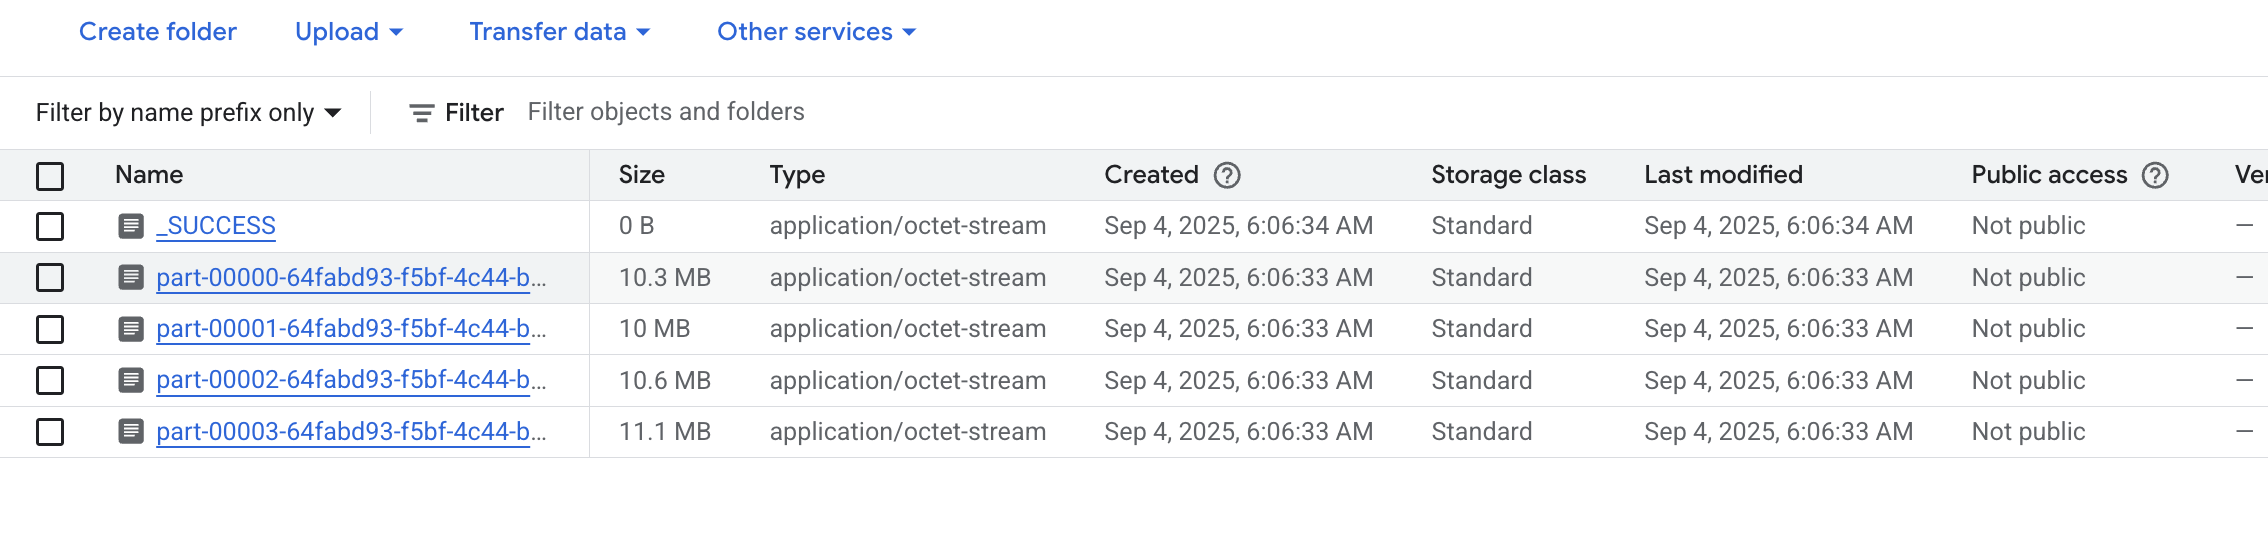

# Data Import: Moving data from GCS to a BigQuery table.
This cell defines a BigQuery Spark procedure named **sp_gcs_import_to_bq** that handles a common data engineering task: moving data from a Google Cloud Storage (GCS) bucket to a BigQuery table.

The procedure is written in Python and uses the powerful pyspark library to read data from a specified GCS source path and then write it to a target BigQuery table. This demonstrates a seamless way to leverage the scalability of Spark directly within BigQuery for efficient data import. The procedure takes three input parameters: the source GCS path, the destination BigQuery table name, and a temporary GCS bucket for staging.

In [42]:
sql_procedure_gcs_import_to_bq = f"""
CREATE OR REPLACE PROCEDURE
  `{project_id}.{dataset_id}.sp_gcs_import_to_bq`(source_gcs_path STRING,
    target_bq_table STRING,
    temp_gcs_bucket_path STRING)
WITH CONNECTION `{project_id}.{location}.{connection_name}` OPTIONS (engine='SPARK',
    runtime_version='2.2')
  LANGUAGE python AS R\"\"\"
from pyspark.sql import SparkSession
import os
import json
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Parameters from BigQuery
source_gcs_path = str(json.loads(os.environ["BIGQUERY_PROC_PARAM.source_gcs_path"]))
target_bq_table = str(json.loads(os.environ["BIGQUERY_PROC_PARAM.target_bq_table"]))
temp_gcs_bucket_path = str(json.loads(os.environ["BIGQUERY_PROC_PARAM.temp_gcs_bucket_path"]))

logger.info(f"Reading data from GCS bucket: {{source_gcs_path}}")
logger.info(f"Writing data to BigQuery table: {{target_bq_table}}")
logger.info(f"Using temporary GCS bucket: {{temp_gcs_bucket_path}}")

spark = SparkSession.builder \\
    .appName("GCSToBigQueryImport") \\
    .getOrCreate()

try:
    # Read data from the GCS bucket (assuming Parquet format)
    source_df = spark.read \\
        .format("parquet") \\
        .load(source_gcs_path)

    logger.info("Reading data from GCS is successful.")

    # Write the DataFrame to the BigQuery table,
    # using the provided temporary GCS bucket for staging
    source_df.write \\
        .format("bigquery") \\
        .option("table", target_bq_table) \\
        .option("temporaryGcsBucket", temp_gcs_bucket_path) \\
        .mode("overwrite") \\
        .save()

    logger.info("Import to BigQuery successful.")

except Exception as e:
    logger.error("An error occurred during the GCS to BigQuery import.", exc_info=True)
    raise

finally:
    spark.stop()
\"\"\";
"""

**Create spark procedure** This cell will create the BigQuery Spark procedure by executing the execute_bq_procedure function with the SQL statement we defined earlier.

In [43]:
execute_bq_procedure(project_id, location, sql_procedure_gcs_import_to_bq)

Procedure Output:

Procedure executed successfully!


**BigQuery table to load data** This cell creates an empty BigQuery table named bikeshare_trips with a predefined schema. This table will serve as the destination for the data imported from the GCS bucket. The schema matches that of the original public dataset, ensuring the imported data will be correctly structured.

In [44]:
create_table_query = f"""
CREATE OR REPLACE TABLE `{project_id}.{dataset_id}.bikeshare_trips` (
  trip_id STRING,
  subscriber_type STRING,
  bike_id STRING,
  bike_type STRING,
  start_time TIMESTAMP,
  start_station_id INT64,
  start_station_name STRING,
  end_station_id STRING,
  end_station_name STRING,
  duration_minutes INT64
);
"""

execute_bq_procedure(project_id, location, create_table_query)

Procedure Output:

Procedure executed successfully!


**Procedure variables** This cell defines the source and destination for the data import process. The source_gcs_path specifies the location of the Parquet files in the GCS bucket to be read. The target_bq_table defines the BigQuery table where the data will be loaded, and the temp_gcs_bucket_path is a temporary bucket used by the Spark job for staging data.


In [45]:
# Data Import: Moving data from GCS to a BigQuery table.
source_gcs_path = f"gs://{bucket_name}/export_data/*.parquet"
target_bq_table = f"{project_id}.{dataset_id}.bikeshare_trips"
temp_gcs_bucket_path = bucket_name

**Call spark procedure** This cell executes the sp_gcs_import_to_bq procedure. It uses the execute_bq_procedure function to call the BigQuery Spark procedure with the defined GCS source path, the target BigQuery table, and the temporary GCS bucket, initiating the data import job. After the job completes, you can query the destination BigQuery table to confirm the data has been loaded successfully.

In [46]:
sql_procedure_call_gcs_import_to_bq = f"CALL `{project_id}.{dataset_id}.sp_gcs_import_to_bq`('{source_gcs_path}', '{target_bq_table}', '{temp_gcs_bucket_path}');"
execute_bq_procedure(project_id, location, sql_procedure_call_gcs_import_to_bq)

Procedure Output:

Procedure executed successfully!


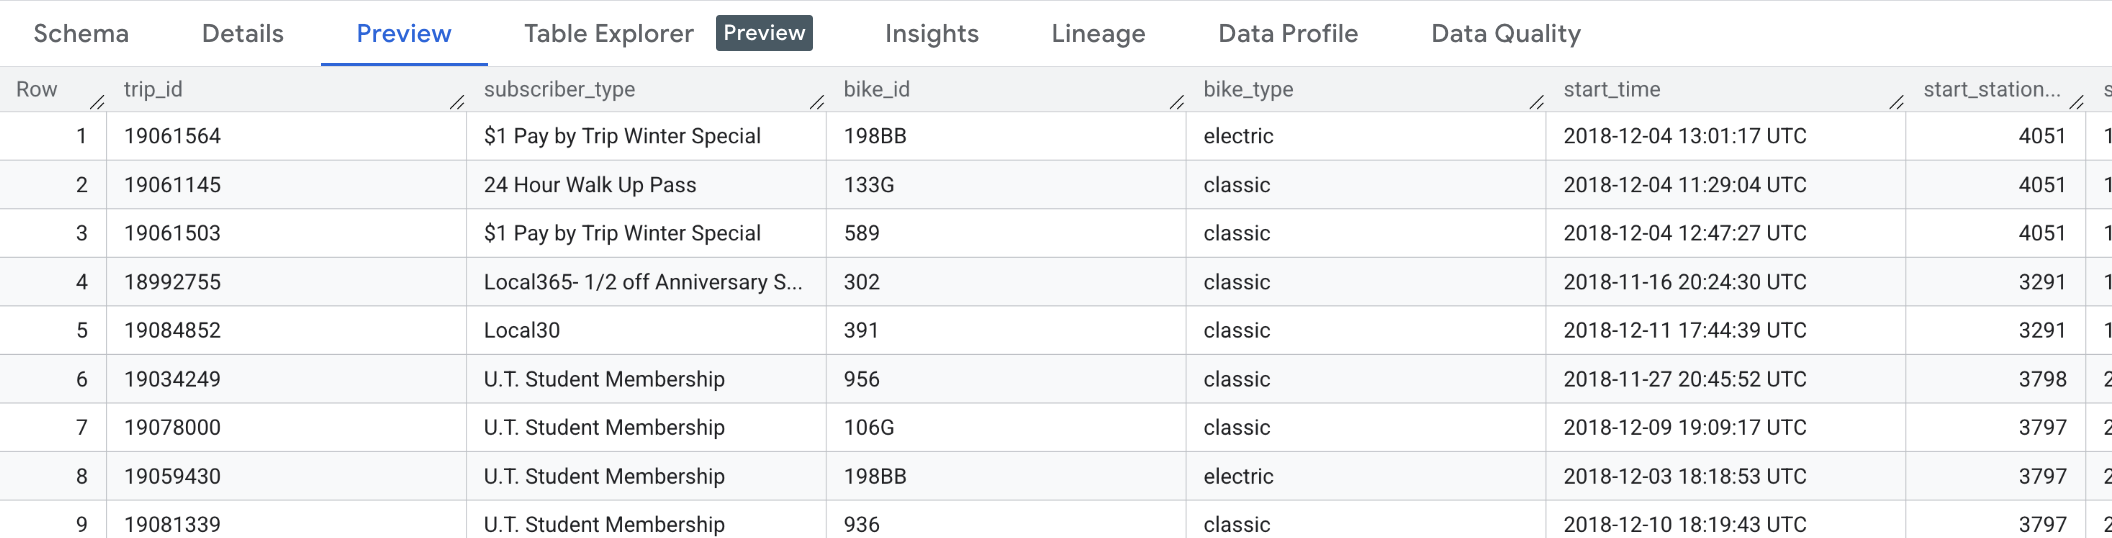

#Summary and next steps

This notebook demonstrates how to leverage BigQuery Spark procedures to perform common data engineering tasks directly within BigQuery. By using a PySpark-based environment, you can efficiently import and export data between BigQuery tables and Google Cloud Storage.

BigQuery Spark procedures allow you to run scalable Spark code without managing a separate cluster, simplifying your data workflows.

Learn more about BigQuery Spark procedures in the [documentation](https://cloud.google.com/bigquery/docs/spark-procedures) and find more sample notebooks in the [GitHub repo](https://github.com/googleapis/python-bigquery-dataframes/tree/main/notebooks)


## Cleaning Up

To clean up all Google Cloud resources used in this project, you can [delete the Google Cloud project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#shutting_down_projects) you used for the tutorial.
Alternatively, you can delete the individual resources created in this notebook.

In [23]:
! bq rm --connection --project_id={project_id} --location={location} {connection_name}
! gcloud storage rm --recursive gs://{bucket_name}
! bq rm --dataset --force --recursive {project_id}:{dataset_id}

Removing objects:
Removing gs://gcs_spark_procedure_poc/export_data/#1756971745514081...
Removing gs://gcs_spark_procedure_poc/export_data/part-00000-334ba79d-9a8f-4207-9a03-f194abf36246-c000.snappy.parquet#1756971743321312...
Removing gs://gcs_spark_procedure_poc/export_data/part-00003-334ba79d-9a8f-4207-9a03-f194abf36246-c000.snappy.parquet#1756971745070793...
Removing gs://gcs_spark_procedure_poc/export_data/part-00002-334ba79d-9a8f-4207-9a03-f194abf36246-c000.snappy.parquet#1756971743344639...
Removing gs://gcs_spark_procedure_poc/export_data/_SUCCESS#1756971745698437...
Removing gs://gcs_spark_procedure_poc/export_data/part-00001-334ba79d-9a8f-4207-9a03-f194abf36246-c000.snappy.parquet#1756971745021756...
Removing buckets:
Removing gs://gcs_spark_procedure_poc/...
